In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('walkrun.csv')

In [3]:
data.head()

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922

In [4]:
# dropping unnecessary columns

In [5]:
data.drop(columns=["date", "time", "username", "wrist"],inplace=True)

In [6]:
data

activity  acceleration_x  acceleration_y  acceleration_z  gyro_x  \
0             0          0.2650         -0.7814         -0.0076 -0.0590   
1             0          0.6722         -1.1233         -0.2344 -0.1757   
2             0          0.4399         -1.4817          0.0722 -0.9105   
3             0          0.3031         -0.8125          0.0888  0.1199   
4             0          0.4814         -0.9312          0.0359  0.0527   
...         ...             ...             ...             ...     ...   
88583         0          0.3084         -0.8376         -0.1327  0.4823   
88584         0          0.4977         -1.0027         -0.4397  0.1022   
88585         0          0.4587         -1.1780         -0.2827 -1.4500   
88586         0          0.2590         -0.8582         -0.0759 -1.5165   
88587         0          0.3140         -0.8008         -0.0911  0.1183   

       gyro_y  gyro_z  
0      0.0325 -2.9296  
1      0.0208  0.1269  
2      0.1063 -2.4367  
3     -0.4099 -2.9336  
4      0.4379  2.4922  
...       ...     ...  
88583  2.0124  0.6048  
88584 -1.2565 -0.0761  
88585 -0.2792 -1.2616  
88586  0.4560 -1.7755  
88587  1.0850  1.2814  

[88588 rows x 7 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.7 MB


In [8]:
data.describe().T

count      mean       std     min       25%     50%  \
activity        88588.0  0.500801  0.500002  0.0000  0.000000  1.0000   
acceleration_x  88588.0 -0.074811  1.009299 -5.3505 -0.381800 -0.0595   
acceleration_y  88588.0 -0.562585  0.658458 -3.2990 -1.033500 -0.7591   
acceleration_z  88588.0 -0.313956  0.486815 -3.7538 -0.376000 -0.2210   
gyro_x          88588.0  0.004160  1.253423 -4.4306 -0.920700  0.0187   
gyro_y          88588.0  0.037203  1.198725 -7.4647 -0.644825  0.0393   
gyro_z          88588.0  0.022327  1.914423 -9.4800 -1.345125  0.0069   

                     75%      max  
activity        1.000000   1.0000  
acceleration_x  0.355500   5.6033  
acceleration_y -0.241775   2.6680  
acceleration_z -0.085900   1.6403  
gyro_x          0.888800   4.8742  
gyro_y          0.733700   8.4980  
gyro_z          1.398200  11.2662

In [9]:
data.isnull().sum()

activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [10]:
data.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

#### Here 0 indicates Walk and 1 indicates Run

# Visualization

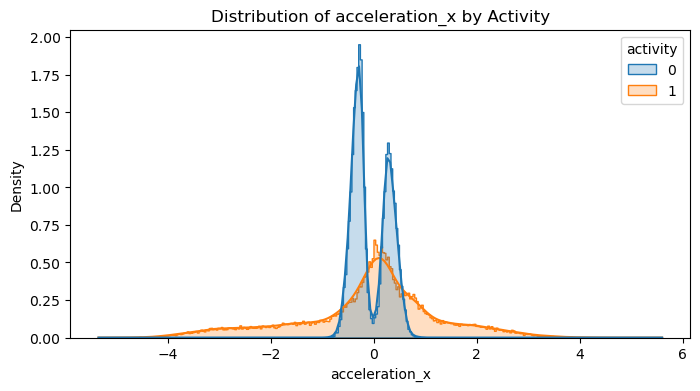

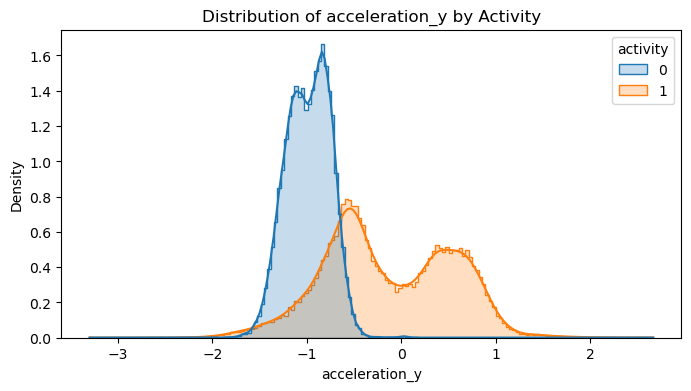

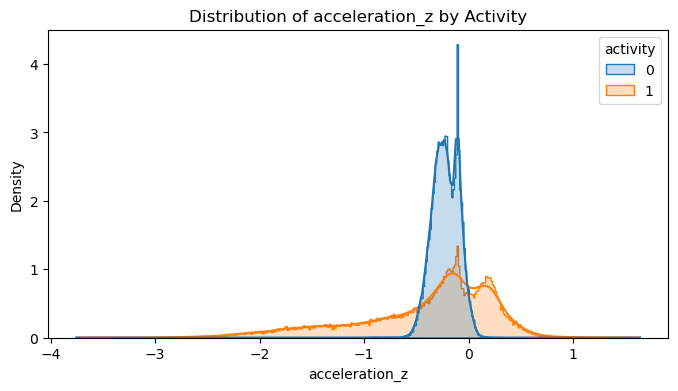

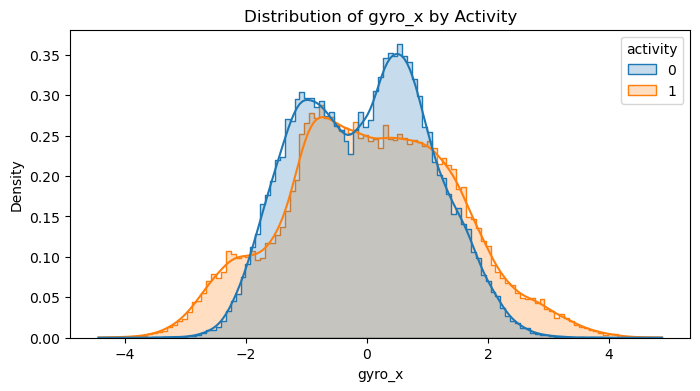

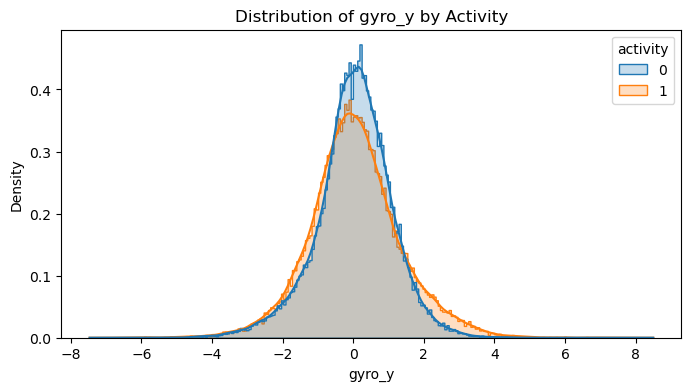

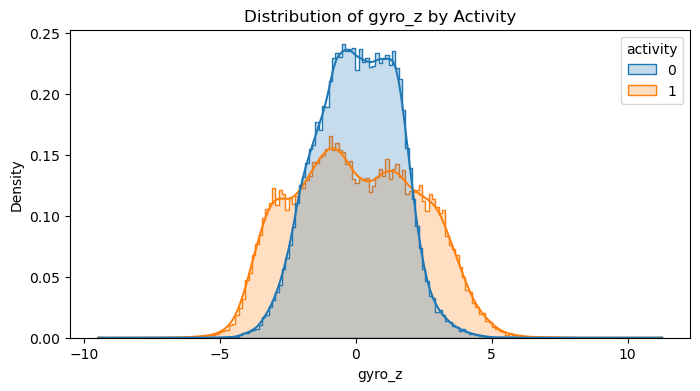

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot gyro_x, gyro_y, gyro_z with hue='activity'
for col in ['acceleration_x', 'acceleration_y', 'acceleration_z','gyro_x', 'gyro_y', 'gyro_z']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, kde=True, hue='activity', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Activity')
    plt.show()


- acceleration_x:
Running shows stronger forward-backward movement, resulting in a wider and flatter distribution than walking.

- acceleration_y:
Side-to-side motion increases slightly during running, with a moderate increase in value spread over walking.

- acceleration_z:
Vertical acceleration is much higher while running, indicating greater ground impact and body lift.


- gyro_x:
Wrist tilt motion is more intense during running, leading to a broader value distribution than walking.

- gyro_y:
Side rotational movement increases with running; walking remains smoother with a more narrow distribution.

- gyro_z:
Twisting motion of the wrist is significantly stronger in running, clearly separating it from walking.

## multi variate analysis

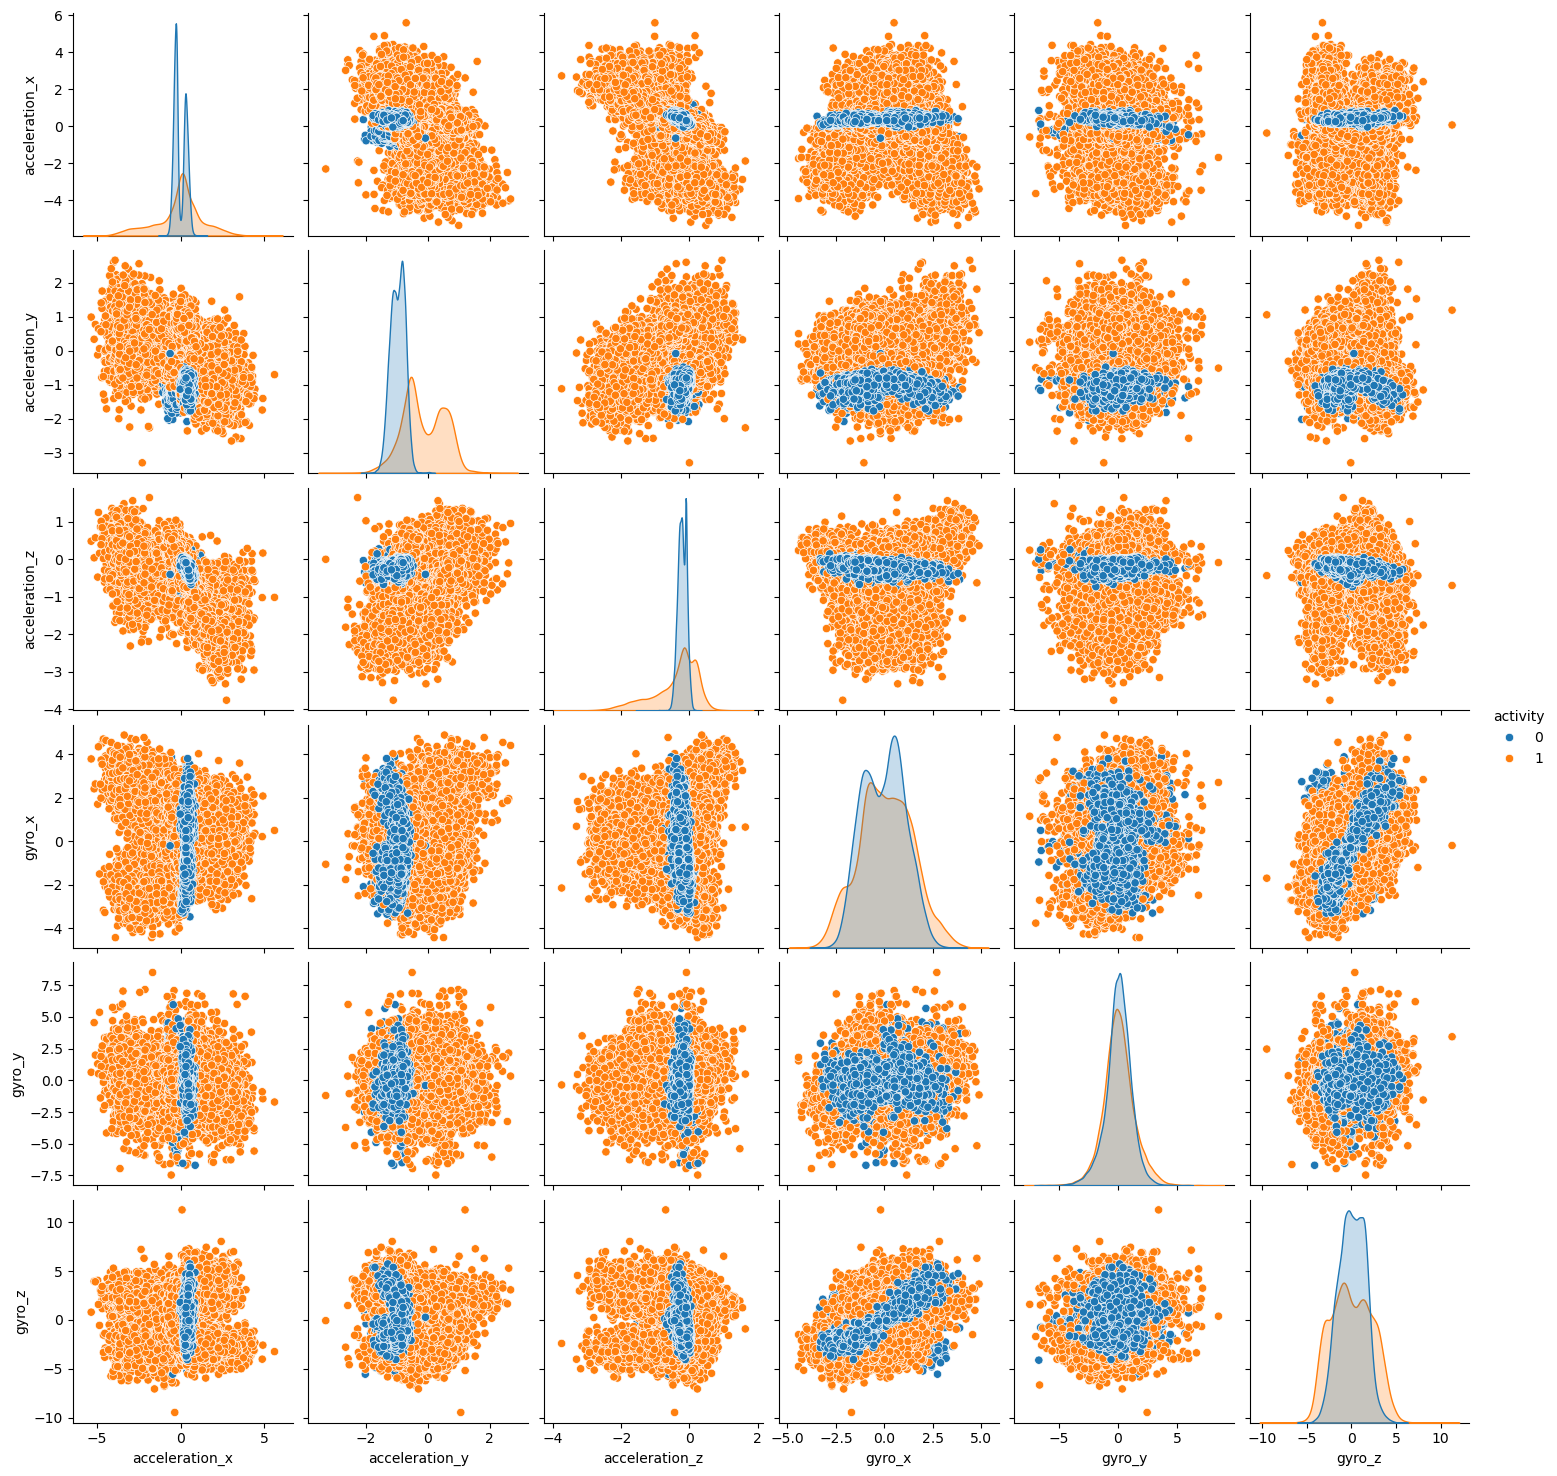

In [12]:
import seaborn as sns
sns.pairplot(data[['acceleration_x', 'acceleration_y', 'acceleration_z', 
                 'gyro_x', 'gyro_y', 'gyro_z', 'activity']], hue='activity')


#### Insights:“Pairplot visualizations revealed that gyroscope features, especially gyro_y and gyro_z, are highly discriminative between walking and running. Acceleration features also provided noticeable separation, particularly in acceleration_z. These clear clusters support the validity of the activity labels and confirm that raw sensor data is sufficient for effective activity classification. Moreover, the presence of some outliers suggests potential for improved accuracy through data cleaning or anomaly handling.”

# FEATURE ENGINEERING

## Box plot for Outliers handling

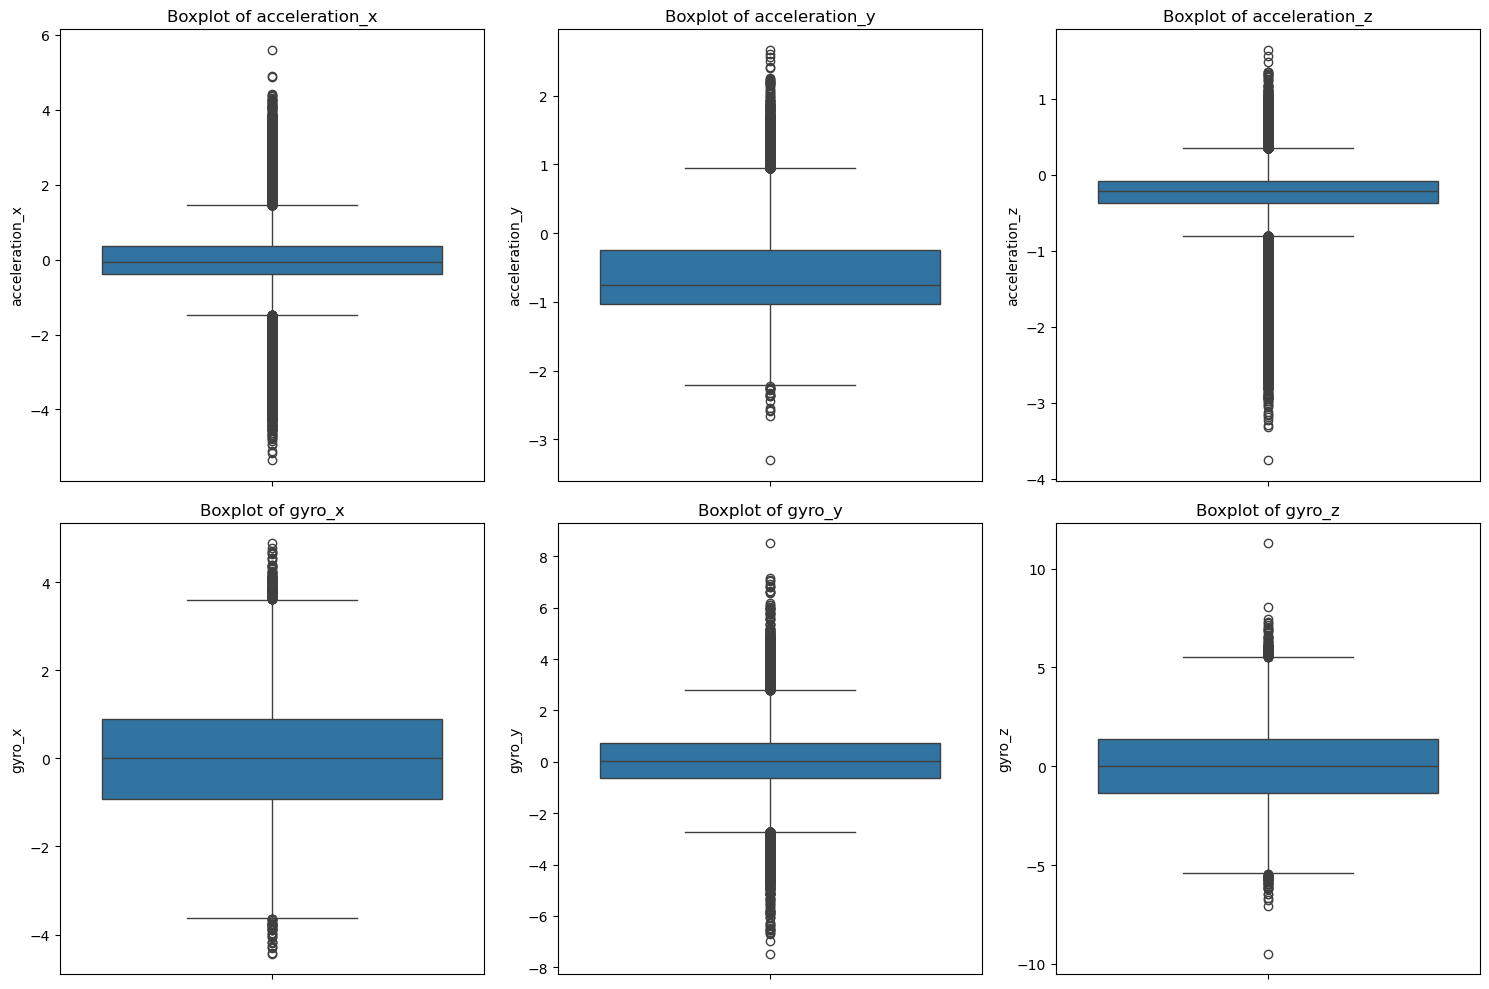

In [13]:


features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 
            'gyro_x', 'gyro_y', 'gyro_z']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#### Insights: Here we are not removing outliers because Sensor-based human activity data such as acceleration and gyroscope readings often contain natural spikes or extreme values due to sudden movements, environmental noise, or changes in walking/running patterns. These values are not necessarily errors .In fact, they may represent valid physical behavior, such as a quick turn or jump during running. Removing them could risk losing valuable signals that help the model learn.

## EDA and Correlation matrics

In [15]:
from ydata_profiling import ProfileReport

In [16]:
profile=ProfileReport(data,title="EDA",explorative=False)

In [17]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* "Since we're using a Multi-Layer Perceptron and the features are highly correlated with the target variable, we should keep both acceleration_y and acceleration_z. These features will help improve model accuracy, and neural networks are capable of handling correlated inputs efficiently."
* "ACTIVITY column is Numerical column.Though the ACTIVITY column is numeric, it represents two categories (walking and running), so it's treated as a categorical target variable during EDA."



## PRE PROCESSING 

#### Our all columns are numerical column and our data is continuous.So for this data we have to use Standard scaler except Activity column because it's our Target column.After spliting our data we will apply standard scaler on Independent variable

In [21]:
X = data.drop(columns=['activity'])
y = data['activity']

In [22]:
X

acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922
...               ...             ...             ...     ...     ...     ...
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814

[88588 rows x 6 columns]

In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=30,
                       random_state=2,verbose=1)

In [30]:
model

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=30,
              random_state=2, verbose=1)

In [31]:
model.fit(X_train_scaled,y_train)

Iteration 1, loss = 0.07397953
Iteration 2, loss = 0.05093200
Iteration 3, loss = 0.04720396
Iteration 4, loss = 0.04584224
Iteration 5, loss = 0.04528389
Iteration 6, loss = 0.04458969
Iteration 7, loss = 0.04226260
Iteration 8, loss = 0.04379792
Iteration 9, loss = 0.04422381
Iteration 10, loss = 0.04156940
Iteration 11, loss = 0.04204358
Iteration 12, loss = 0.04050540
Iteration 13, loss = 0.04285469
Iteration 14, loss = 0.04275300
Iteration 15, loss = 0.04075574
Iteration 16, loss = 0.04257199
Iteration 17, loss = 0.04195464
Iteration 18, loss = 0.04144241
Iteration 19, loss = 0.04859971
Iteration 20, loss = 0.04188690
Iteration 21, loss = 0.04478230
Iteration 22, loss = 0.04119975
Iteration 23, loss = 0.04182128
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=30,
              random_state=2, verbose=1)

In [32]:
y_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)

In [33]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.9890503739240863
Test accuracy : 0.9883169657974941


In [34]:
print(confusion_matrix(y_test,y_predict))

[[8771   74]
 [ 133 8740]]


In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



### Evaluation Metrics
- **Accuracy**: 99%
- **Precision / Recall / F1 (both classes)**: 0.99
- **Support**: Balanced (8845 vs 8873 samples)
- **Conclusion**: Excellent performance, no signs of overfitting


# Final Conclusion:
The MLP model generalizes extremely well on unseen data and captures the patterns in the sensor data with near-perfect accuracy. The high precision, recall, and F1-scores across both activity classes make this model highly suitable for real-world activity recognition applications such as fitness tracking, wearable sensors, or movement-based alerts.

# Challenges Faced and Project risk

- **Data Quality and Outliers** : One of the initial challenges was identifying whether sudden spikes in acceleration or gyroscope values were valid movements or sensor noise. This created uncertainty about whether to perform outlier removal, especially since some values could represent real human motion like quick turns or jerks.
- **Feature Scaling Decision** : Choosing the right scaler was critical for MLP performance. Since MLP is sensitive to feature scale, we experimented between MinMaxScaler and StandardScaler. After analysis, we selected StandardScaler as it provided better convergence and stability.
- **Hyperparameter Tuning** : Selecting optimal values for hidden_layer_sizes, learning_rate_init, and max_iter required extensive trial and error.GridSearch was time-consuming but necessary to avoid overfitting or underfitting, especially with neural networks.
- **Model Overfitting Risk** : Neural networks are powerful but prone to overfitting. Initially, the model was overfitting when trained on unbalanced data without stratification.Without stratify=y, class imbalance during train_test_split() led to skewed results.This was mitigated using stratify=y during train-test split and applying proper regularization.

